# Train with Whole Labeled

## Set up

In [1]:
import os
from pathlib import Path
import pickle
PATH = Path.cwd().parents[1]

import sys
sys.path.append(str(PATH))
from backend.utils.models.tabular_data import get_trained_best_model
from backend.utils.models.timeline_data import get_trained_gru_model
from backend.utils.comparing import plot_confusion_matrix

2025-07-31 15:49:02.499781: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
DATA_PATH = os.path.join(PATH, 'data')
LABELED_PATH = os.path.join(DATA_PATH, 'labeled')
UNLABELED_PATH = os.path.join(DATA_PATH, 'unlabeled')
MODEL_PATH = os.path.join(PATH, 'backend/models')

## Bytecode Model

In [ ]:
model, ground_df, df, X_train, X_test, y_train, y_test = get_trained_best_model(LABELED_PATH, os.path.join(LABELED_PATH, 'hex'), MODEL_PATH, test_size=0, mode='byte')

[I 2025-07-30 21:08:45,895] A new study created in memory with name: no-name-b44313aa-1220-4eb4-b87b-d6c1c06e3908
invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH30
invalid instruction: PUSH24
invalid instruction: PUSH30
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH16
invalid instruction: PUSH13
invalid instruction: PUSH25
invalid instruction: PUSH21
invalid instruction: PUSH16
invalid instruction: PUSH15
invalid instruction: PUSH19
invalid instruction: PUSH29
invalid instruction: PUSH26
invalid instruction: PUSH20
invalid instruction: PUSH17
invalid instruction: PUSH16
invalid instruction: PUSH20
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH13
invalid instruction: PUSH24
invalid instruction: PUSH27
invalid instruction: PUSH32
invalid instruction: PUSH29
[I 2025-07-30 21:08:50,029] Trial 0 finished with value: 0.403248651932862

In [ ]:
df.head()

,opcode_entropy,byte_entropy,byte_0x,byte_60,byte_80,byte_40,byte_52,byte_04,byte_36,byte_10,...,push1 dup1 dup8,dup4 push1 dup3,push5 dup4,returndatacopy dup1,dup1 returndatacopy dup1,return jumpdest returndatasize,mload push20,swap3 swap2 push1,dup1 push2 jump,dup4 push2 push2
Address,,,,,,,,,,,,,,,,,,,,,
0x8275ebf521dc217aa79c88132017a5bcef001dd9,4.676922,4.331572,0.000160,0.061938,0.028081,0.007542,0.018453,0.005777,0.001605,0.002246,...,0,0,0,0,0,0,0,0,0,0
0x292e89d5d5bdab3af2f5838c194c1983f0140b43,4.655586,6.067508,0.000280,0.117021,0.021837,0.017077,0.033035,0.012318,0.002800,0.003080,...,0,0,0,0,0,1,1,0,0,0
0x2753dce37a7edb052a77832039bcc9aa49ad8b25,4.622489,6.275986,0.000158,0.105847,0.019490,0.012518,0.029789,0.013469,0.003961,0.003486,...,0,1,1,0,0,0,0,0,0,0
0xe1a0ce8b94c6a5e4791401086763d7bd0a6c18f5,4.808809,5.868159,0.000393,0.106007,0.036121,0.017668,0.032195,0.010993,0.003141,0.005497,...,0,0,0,0,0,0,0,0,0,0
0x9db8a10c7fe60d84397860b3af2e686d4f90c2b7,4.810756,6.076166,0.000135,0.109883,0.033437,0.016449,0.034515,0.008494,0.002831,0.006876,...,0,0,0,0,0,0,0,1,1,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0x8275ebf521dc217aa79c88132017a5bcef001dd9 to 0x17e65e6b9b166fb8e7c59432f0db126711246bc0
Columns: 5579 entries, opcode_entropy to dup4 push2 push2
dtypes: float64(259), int64(5320)
memory usage: 2.9+ MB


In [ ]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

        Mint       1.00      0.95      0.97        20
        Leak       1.00      1.00      1.00         9
       Limit       1.00      1.00      1.00        30

   micro avg       1.00      0.98      0.99        59
   macro avg       1.00      0.98      0.99        59
weighted avg       1.00      0.98      0.99        59
 samples avg       0.61      0.60      0.60        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

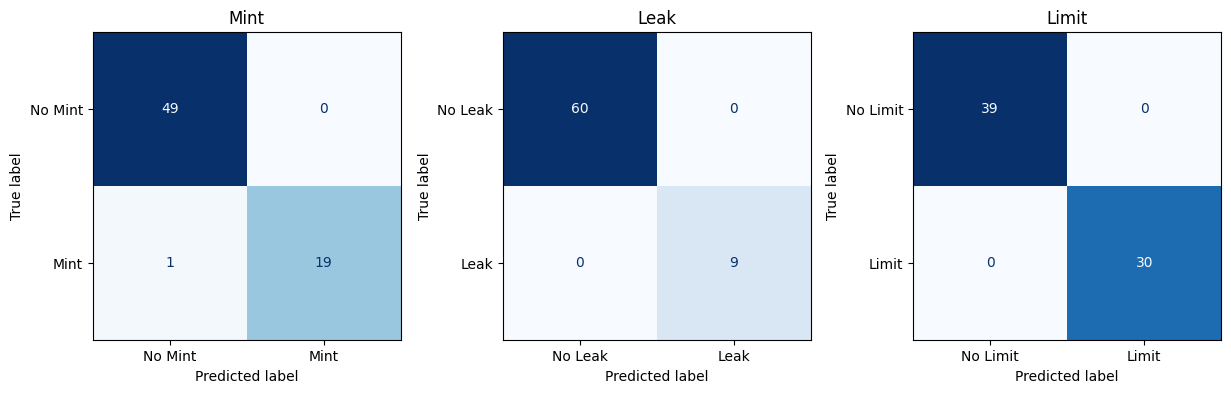

In [ ]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

### Load Saved Model

In [ ]:
byte = pickle.load(open(os.path.join(MODEL_PATH, 'byte.pkl'), 'rb'))

In [ ]:
byte['model']

MultiOutputClassifier(estimator=ExtraTreesClassifier(max_depth=27,
                                                     n_estimators=117,
                                                     random_state=42))

In [ ]:
byte['weights']

array([0.97435897, 1.        , 1.        ])

In [ ]:
byte['feature_cols']

['opcode_entropy',
 'byte_entropy',
 'byte_0x',
 'byte_60',
 'byte_80',
 'byte_40',
 'byte_52',
 'byte_04',
 'byte_36',
 'byte_10',
 'byte_61',
 'byte_00',
 'byte_db',
 'byte_57',
 'byte_35',
 'byte_7c',
 'byte_01',
 'byte_90',
 'byte_63',
 'byte_ff',
 'byte_16',
 'byte_06',
 'byte_fd',
 'byte_de',
 'byte_03',
 'byte_14',
 'byte_e0',
 'byte_09',
 'byte_5e',
 'byte_a7',
 'byte_b3',
 'byte_70',
 'byte_18',
 'byte_0d',
 'byte_dd',
 'byte_d5',
 'byte_23',
 'byte_b8',
 'byte_72',
 'byte_02',
 'byte_31',
 'byte_3c',
 'byte_e5',
 'byte_67',
 'byte_85',
 'byte_42',
 'byte_96',
 'byte_6c',
 'byte_68',
 'byte_b6',
 'byte_66',
 'byte_84',
 'byte_e3',
 'byte_a0',
 'byte_82',
 'byte_48',
 'byte_71',
 'byte_50',
 'byte_a6',
 'byte_9f',
 'byte_8d',
 'byte_a5',
 'byte_cb',
 'byte_5b',
 'byte_95',
 'byte_d8',
 'byte_9b',
 'byte_41',
 'byte_a9',
 'byte_05',
 'byte_9c',
 'byte_bb',
 'byte_9d',
 'byte_d7',
 'byte_3d',
 'byte_d6',
 'byte_62',
 'byte_ed',
 'byte_3e',
 'byte_f2',
 'byte_8b',
 'byte_34',
 'by

In [ ]:
byte['vectorizer']

CountVectorizer(max_features=13172, min_df=3, ngram_range=(1, 3))

In [ ]:
y_pred = byte['model'].predict(X_test)

              precision    recall  f1-score   support

        Mint       1.00      0.95      0.97        20
        Leak       1.00      1.00      1.00         9
       Limit       1.00      1.00      1.00        30

   micro avg       1.00      0.98      0.99        59
   macro avg       1.00      0.98      0.99        59
weighted avg       1.00      0.98      0.99        59
 samples avg       0.61      0.60      0.60        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

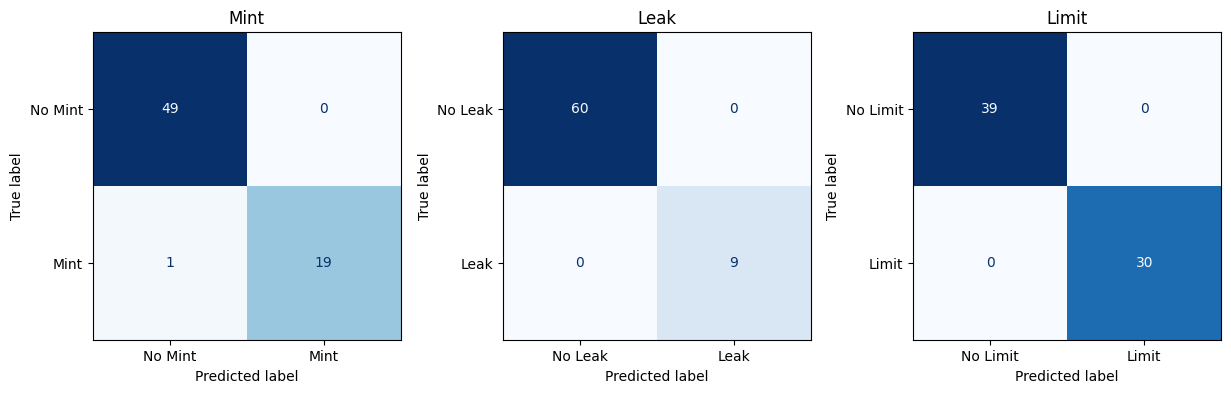

In [ ]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

## Source Code Model

In [3]:
model, ground_df, df, X_train, X_test, y_train, y_test = get_trained_best_model(LABELED_PATH, os.path.join(LABELED_PATH, 'sol'), MODEL_PATH, test_size=0, mode='code')

[I 2025-07-31 14:03:51,837] A new study created in memory with name: no-name-3466ea08-37e7-414d-b6d3-4d8781d942fb
[I 2025-07-31 14:03:52,290] Trial 0 finished with value: 0.5880736079652488 and parameters: {'model': 'LogisticRegression', 'C': 2.3688491530852747, 'n_max_features': 17919, 'n_min_df': 3}. Best is trial 0 with value: 0.5880736079652488.
[I 2025-07-31 14:03:52,767] Trial 1 finished with value: 0.0 and parameters: {'model': 'SGD', 'alpha': 0.07631150791700943, 'loss': 'hinge', 'n_max_features': 10989, 'n_min_df': 3}. Best is trial 0 with value: 0.5880736079652488.
[I 2025-07-31 14:03:53,353] Trial 2 finished with value: 0.23437296946068875 and parameters: {'model': 'SVC', 'C': 0.829705892233956, 'kernel': 'rbf', 'n_max_features': 19645, 'n_min_df': 2}. Best is trial 0 with value: 0.5880736079652488.
[I 2025-07-31 14:03:53,845] Trial 3 finished with value: 0.0745920745920746 and parameters: {'model': 'SGD', 'alpha': 0.055058056475960376, 'loss': 'hinge', 'n_max_features': 153

✅ Best Params: {'model': 'LogisticRegression', 'C': 2.17276135379117, 'n_max_features': 10351, 'n_min_df': 1}
🥇 Best Score: 0.6203543370210036
✅ Model saved code.pkl


In [4]:
df.head()

,spdx,license,identifier,mit,pragma,solidity,0,6,12,import,...,setmaster,syncpair,rewardholders,_issuper,_getethequivalent,bought,sold,soldeth,_hasliquidity,amounttokens
Address,,,,,,,,,,,,,,,,,,,,,
0xa0ffc741f109159ee203424a299e6d2731dcfc76,0.159041,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x85aa3f04e539e426cbb55c0d584ea99cfe1d96a1,0.083292,0.011524,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,0.088255,0.030340,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xe4182e57eeb29fbc2b3469e45c9e385cea8995ab,0.088522,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x108d0f1fc10ed324f8cc65d0a91cad11cd4994a4,0.118818,0.007929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 68 entries, 0xa0ffc741f109159ee203424a299e6d2731dcfc76 to 0x8b2e68075a06959e3e35aa0e451a13e099e41b23
Columns: 5417 entries, spdx to amounttokens
dtypes: float64(5417)
memory usage: 2.8+ MB


In [6]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

        Mint       0.71      1.00      0.83        20
        Leak       1.00      1.00      1.00         9
       Limit       0.81      0.73      0.77        30

   micro avg       0.80      0.86      0.83        59
   macro avg       0.84      0.91      0.87        59
weighted avg       0.81      0.86      0.83        59
 samples avg       0.54      0.54      0.53        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

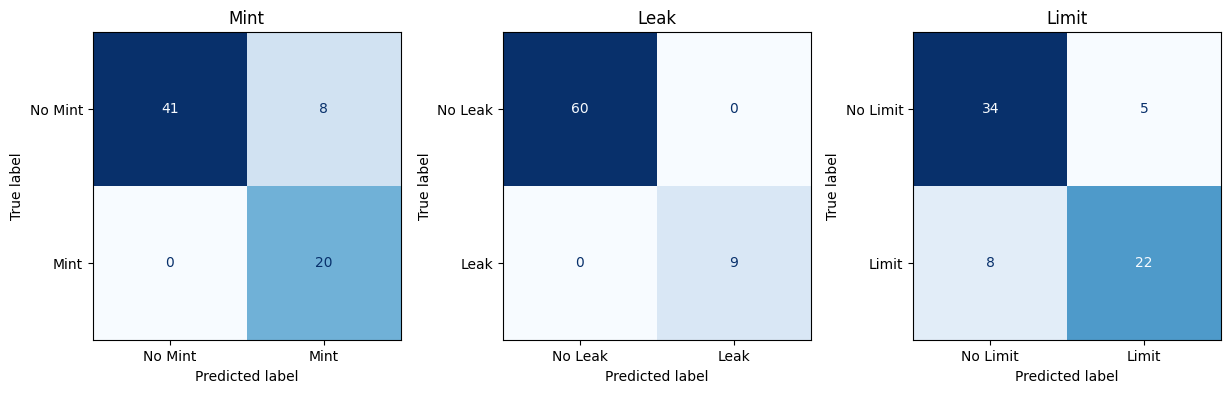

In [7]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

### Load Saved Model

In [8]:
code = pickle.load(open(os.path.join(MODEL_PATH, 'code.pkl'), 'rb'))

In [9]:
code['model']

MultiOutputClassifier(estimator=LogisticRegression(C=2.17276135379117,
                                                   class_weight='balanced',
                                                   random_state=42,
                                                   solver='liblinear'))

In [10]:
code['weights']

array([0.83333333, 1.        , 0.77192982])

In [11]:
code['feature_cols']

['spdx',
 'license',
 'identifier',
 'mit',
 'pragma',
 'solidity',
 '0',
 '6',
 '12',
 'import',
 'interfaces',
 'imasterchef',
 'sol',
 'basemissionlpsingle',
 'contract',
 'missionmasterchef',
 'is',
 'using',
 'safemath',
 'for',
 'uint256',
 'safeerc20',
 'ierc20',
 'address',
 'public',
 'masterchefaddress',
 'pid',
 'constructor',
 '_vaultchefaddress',
 '_masterchefaddress',
 '_unirouteraddress',
 '_pid',
 '_wantaddress',
 '_earnedaddress',
 'memory',
 '_earnedtowmaticpath',
 '_earnedtousdcpath',
 '_earnedtotoken0path',
 '_earnedtotoken1path',
 '_token0toearnedpath',
 '_token1toearnedpath',
 'govaddress',
 'msg',
 'sender',
 'vaultchefaddress',
 'unirouteraddress',
 'wantaddress',
 'token0address',
 'iunipair',
 'token0',
 'token1address',
 'token1',
 'earnedaddress',
 'earnedtowmaticpath',
 'earnedtousdcpath',
 'earnedtotoken0path',
 'earnedtotoken1path',
 'token0toearnedpath',
 'token1toearnedpath',
 'transferownership',
 '_resetallowances',
 'function',
 '_vaultdeposit',
 '_a

In [12]:
code['vectorizer']

TfidfVectorizer(max_features=10351, token_pattern='\\b\\w+\\b')

In [13]:
y_pred = code['model'].predict(X_test)

              precision    recall  f1-score   support

        Mint       0.71      1.00      0.83        20
        Leak       1.00      1.00      1.00         9
       Limit       0.81      0.73      0.77        30

   micro avg       0.80      0.86      0.83        59
   macro avg       0.84      0.91      0.87        59
weighted avg       0.81      0.86      0.83        59
 samples avg       0.54      0.54      0.53        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

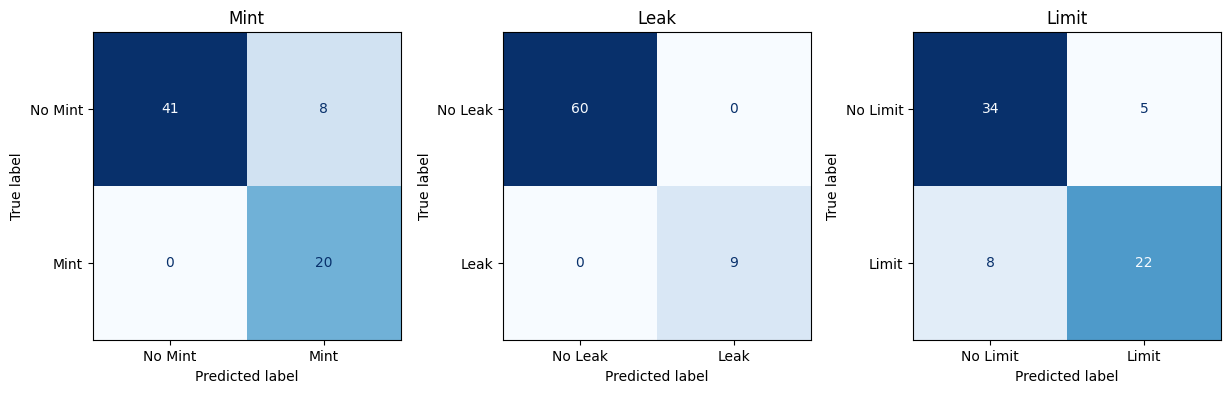

In [14]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

## Transaction Model

In [3]:
model, ground_df, df, X_train, X_test, y_train, y_test = get_trained_best_model(LABELED_PATH, os.path.join(LABELED_PATH, 'txn'), MODEL_PATH, n_trials=20, test_size=0, mode='txn')

[I 2025-07-30 19:40:14,984] A new study created in memory with name: no-name-423b2c13-8361-4031-816a-edf4ade540a0
[I 2025-07-30 19:40:16,085] Trial 0 finished with value: 0.26169029038594255 and parameters: {'model': 'ExtraTrees', 'n_estimators': 157, 'max_depth': 22}. Best is trial 0 with value: 0.26169029038594255.
[I 2025-07-30 19:40:16,347] Trial 1 finished with value: 0.12433862433862435 and parameters: {'model': 'LightGBM', 'n_estimators': 71, 'max_depth': 6, 'learning_rate': 0.17360514577747813, 'subsample': 0.7031364140690145, 'colsample_bytree': 0.6620695021700235}. Best is trial 0 with value: 0.26169029038594255.
[I 2025-07-30 19:40:18,757] Trial 2 finished with value: 0.23423551756885094 and parameters: {'model': 'AdaBoost', 'n_estimators': 189, 'learning_rate': 0.2620841947403081}. Best is trial 0 with value: 0.26169029038594255.
[I 2025-07-30 19:40:19,020] Trial 3 finished with value: 0.29205855872522535 and parameters: {'model': 'MLP', 'hidden_layer_sizes': '100_50', 'act

✅ Best Params: {'model': 'LogisticRegression', 'C': 3.465652846556023}
🥇 Best Score: 0.43635224715684484
✅ Model saved txn.pkl


In [4]:
df.head()

,txn_nums,event_nums,creation_block,creation_timestamp,start_block,end_block,life_time,start_time,end_time,duration_seconds,...,presalemint_num,changepresalestate_num,setapprovalforall_num,safetransferfrom_num,release_num,setbaseuri_num,reveal_num,createordinaltrade_num,enableordinaltrade_num,removeordinallimit_num
Address,,,,,,,,,,,,,,,,,,,,,
0x50c6ec50a89a946c5886aeb54a22fe732558f7d1,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xee45e37e2b73e86c709d9edd1c8ea3b0ec72dad3,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x292f57c7fcd726ba651e46b620d99cc6afe0ec1c,1,2,16832271,1678870799,16832271.0,16832271.0,0.0,1.678871e+09,1.678871e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0xba751bff276907c438e927d2c2f18de574195e4b,0,0,0,0,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0x1c5ee1ffebec5f3e1686e8e59d43f96a3c702b7f,15,65,18559580,1699837391,18559580.0,18567687.0,8107.0,1.699837e+09,1.699935e+09,97896.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 69 entries, 0x50c6ec50a89a946c5886aeb54a22fe732558f7d1 to 0x16dfb898cf7029303c2376031392cb9bac450f94
Data columns (total 98 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   txn_nums                                                69 non-null     int64  
 1   event_nums                                              69 non-null     int64  
 2   creation_block                                          69 non-null     int64  
 3   creation_timestamp                                      69 non-null     int64  
 4   start_block                                             69 non-null     float64
 5   end_block                                               69 non-null     float64
 6   life_time                                               69 non-null     float64
 7   start_time                                         

In [6]:
y_pred = model.predict(X_test)

              precision    recall  f1-score   support

        Mint       0.33      0.85      0.48        20
        Leak       0.22      0.89      0.35         9
       Limit       0.51      0.83      0.63        30

   micro avg       0.36      0.85      0.51        59
   macro avg       0.35      0.86      0.49        59
weighted avg       0.41      0.85      0.54        59
 samples avg       0.29      0.51      0.36        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

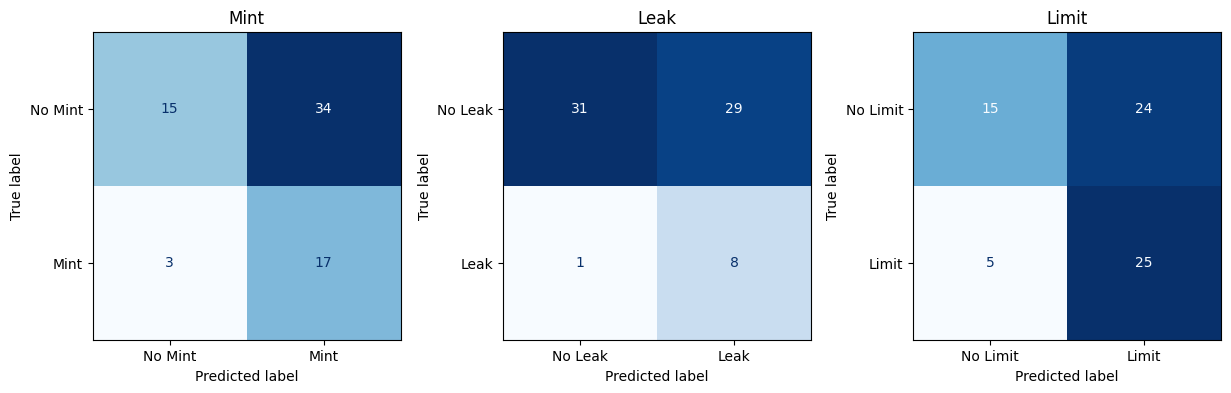

In [7]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

### Load Saved Model

In [8]:
txn = pickle.load(open(os.path.join(MODEL_PATH, 'txn.pkl'), 'rb'))

In [9]:
txn['model']

MultiOutputClassifier(estimator=LogisticRegression(C=3.465652846556023,
                                                   class_weight='balanced',
                                                   random_state=42,
                                                   solver='liblinear'))

In [10]:
txn['weights']

array([0.47887324, 0.34782609, 0.63291139])

In [ ]:
txn['feature_cols']

['txn_nums',
 'event_nums',
 'creation_block',
 'creation_timestamp',
 'start_block',
 'end_block',
 'life_time',
 'start_time',
 'end_time',
 'duration_seconds',
 'from_creation_to_transfer',
 'num_addresses',
 'num_buyers',
 'num_sellers',
 'num_creator_transfers',
 'buy_amt',
 'sell_amt',
 'avg_value',
 'txn_per_block',
 'avg_gas_limit',
 'max_gas_limit',
 'min_gas_limit',
 'std_gas_limit',
 'avg_gas_used',
 'max_gas_used',
 'min_gas_used',
 'std_gas_used',
 'avg_gas_price',
 'max_gas_price',
 'min_gas_price',
 'std_gas_price',
 'ownershiptransferred_num',
 'transfer_num',
 'atinversebrah_num',
 'approval_num',
 'approve_num',
 'renounceownership_num',
 'removefee_num',
 'transferfrom_num',
 'burn_num',
 'increaseallowance_num',
 'swapexacttokensforethsupportingfeeontransfertokens_num',
 'transferownership_num',
 'opentrading_num',
 'rolegranted_num',
 'mint_num',
 'swapandliquify_num',
 'bridgemint_num',
 'setbridgeaddress_num',
 'setswapandliquifyenabled_num',
 'createstrongtrade_

In [12]:
txn['vectorizer']

{}

In [13]:
y_pred = txn['model'].predict(X_test)

              precision    recall  f1-score   support

        Mint       0.33      0.85      0.48        20
        Leak       0.22      0.89      0.35         9
       Limit       0.51      0.83      0.63        30

   micro avg       0.36      0.85      0.51        59
   macro avg       0.35      0.86      0.49        59
weighted avg       0.41      0.85      0.54        59
 samples avg       0.29      0.51      0.36        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

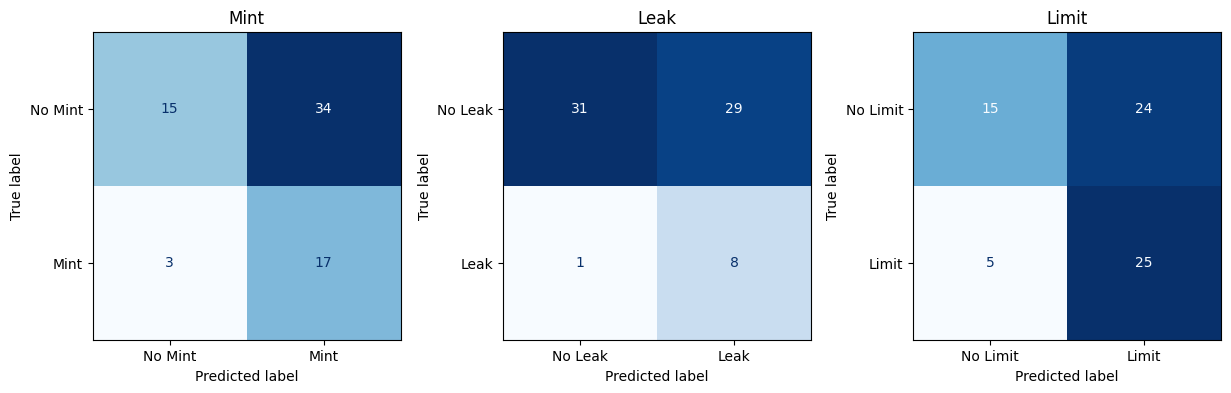

In [14]:
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

## Timeline Model

In [4]:
model, ground_df, _, X_test, _, y_test, thresholds = get_trained_gru_model(LABELED_PATH, MODEL_PATH, n_trials=1, epochs=30)

100%|██████████| 69/69 [00:00<00:00, 72.15it/s] 
[I 2025-07-31 15:50:51,736] A new study created in memory with name: no-name-d4385ce4-65af-499e-af15-76c48fd5482c


Epoch 1/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.3391 - loss: 0.6911 - val_accuracy: 0.2609 - val_loss: 0.6515 - learning_rate: 0.0013
Epoch 2/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 655ms/step - accuracy: 0.2627 - loss: 0.6493 - val_accuracy: 0.2899 - val_loss: 0.6182 - learning_rate: 0.0013
Epoch 3/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 680ms/step - accuracy: 0.2973 - loss: 0.6119 - val_accuracy: 0.3188 - val_loss: 0.5874 - learning_rate: 0.0013
Epoch 4/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 2s/step - accuracy: 0.2922 - loss: 0.5824 - val_accuracy: 0.3188 - val_loss: 0.5601 - learning_rate: 0.0013
Epoch 5/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 962ms/step - accuracy: 0.3313 - loss: 0.5680 - val_accuracy: 0.3188 - val_loss: 0.5567 - learning_rate: 0.0013
Epoch 6/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 850ms/step - accuracy: 0.2928 - loss: 0.5590 - val_accuracy: 0.2899 - val_loss: 0.5330 - learning_rate: 0.0013
Epoch 7/30
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.2973 - loss: 0.5407 - val_accuracy: 0.3043 - 

[I 2025-07-31 15:51:58,236] Trial 0 finished with value: 0.31878471604499 and parameters: {'units': 234, 'lr': 0.0012632103226750777, 'batch_size': 32}. Best is trial 0 with value: 0.31878471604499.


Label 2: Best threshold = 0.17, Best f1 = 0.7671232876712328
✅ Best Params: {'units': 234, 'lr': 0.0012632103226750777, 'batch_size': 32}
🥇 Best Score: 0.31878471604499
Epoch 1/30
3/3 - 6s - 2s/step - accuracy: 0.3333 - loss: 0.6935 - val_accuracy: 0.2899 - val_loss: 0.6582 - learning_rate: 0.0013
Epoch 2/30
3/3 - 4s - 1s/step - accuracy: 0.2899 - loss: 0.6553 - val_accuracy: 0.3043 - val_loss: 0.6246 - learning_rate: 0.0013
Epoch 3/30
3/3 - 5s - 2s/step - accuracy: 0.3043 - loss: 0.6206 - val_accuracy: 0.3043 - val_loss: 0.5940 - learning_rate: 0.0013
Epoch 4/30
3/3 - 4s - 1s/step - accuracy: 0.3043 - loss: 0.5906 - val_accuracy: 0.3043 - val_loss: 0.5673 - learning_rate: 0.0013
Epoch 5/30
3/3 - 4s - 1s/step - accuracy: 0.3043 - loss: 0.5633 - val_accuracy: 0.3043 - val_loss: 0.5472 - learning_rate: 0.0013
Epoch 6/30
3/3 - 5s - 2s/step - accuracy: 0.2899 - loss: 0.5527 - val_accuracy: 0.2899 - val_loss: 0.5385 - learning_rate: 0.0013
Epoch 7/30
3/3 - 4s - 1s/step - accuracy: 0.2899 - 

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 309ms/step
              precision    recall  f1-score   support

        Mint       0.43      0.90      0.58        20
        Leak       0.24      0.89      0.38         9
       Limit       0.65      0.93      0.77        30

   micro avg       0.46      0.92      0.61        59
   macro avg       0.44      0.91      0.58        59
weighted avg       0.51      0.92      0.65        59
 samples avg       0.37      0.55      0.41        59



/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

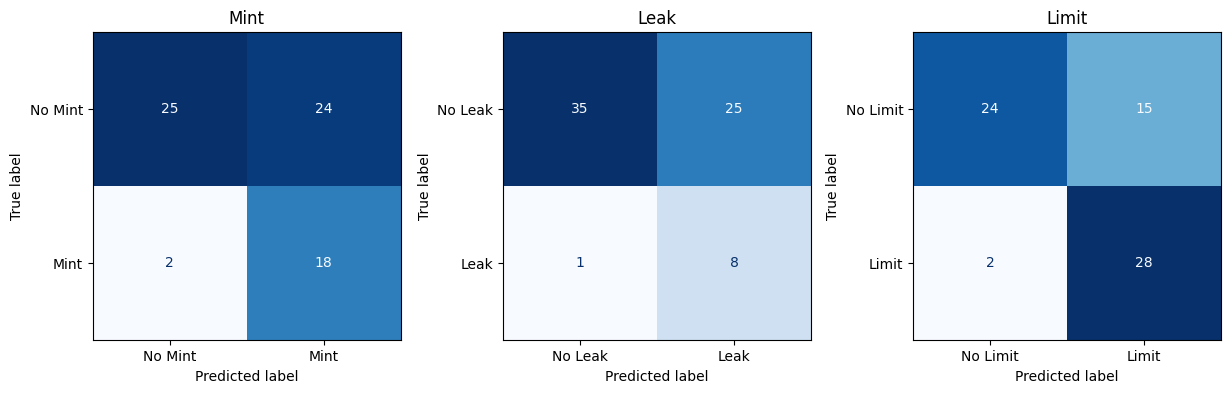

In [5]:
y_pred = model.predict(X_test)
y_pred = (y_pred > thresholds).astype(int)
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))

### Load Saved Model

In [6]:
import tensorflow as  tf
import json

In [7]:
model = tf.keras.models.load_model(os.path.join(MODEL_PATH, 'gru_txn_model.keras'))
extension = json.load(open(os.path.join(MODEL_PATH, 'gru_txn_extension.json')))

In [8]:
extension['thresholds']

[0.46, 0.18, 0.19]

In [9]:
extension['weights']

[0.5806451612903226, 0.38095238095238093, 0.7671232876712328]

2/3 ━━━━━━━━━━━━━━━━━━━━ 0s 283ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x13c4f99e0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 306ms/step
              precision    recall  f1-score   support

        Mint       0.43      0.90      0.58        20
        Leak       0.24      0.89      0.38         9
       Limit       0.65      0.93      0

/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/anaconda3/envs/ml-algo/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true nor predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()}

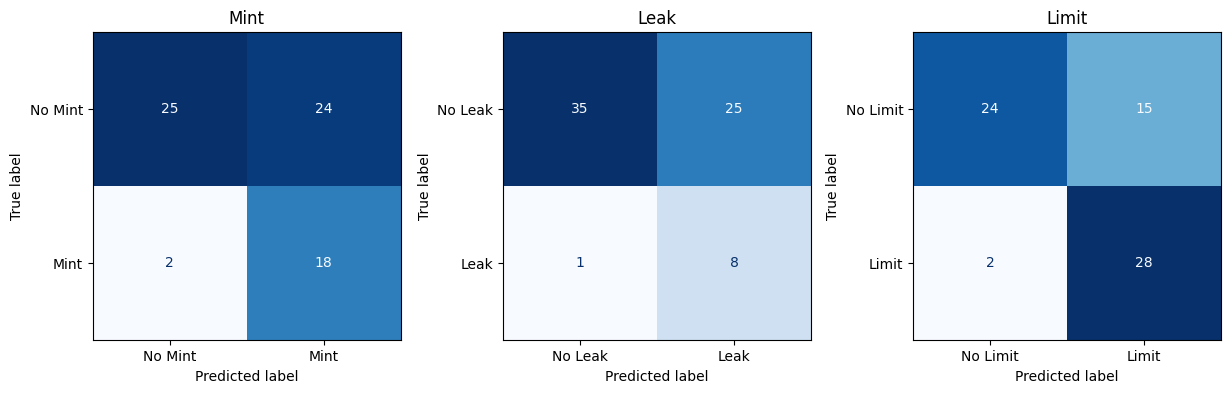

In [10]:
y_pred = model.predict(X_test)
y_pred = (y_pred > extension['thresholds']).astype(int)
plot_confusion_matrix(y_test, y_pred, list(ground_df.columns))